<a href="https://colab.research.google.com/github/nadireus/Clarusway/blob/main/Classification_with_ANN_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Churn Model


The valuable customers can be worth gold for companies.But to satisfy all customers is impossible. Despite the best user experience, there will always be a group of clients who are not satisfied and decide to leave.Many companies faces the problem of how to prevent these departures as  effectively as possible. Churn model helps many companies to reduce their churn amount.With the help of the churn model the company can see the future,they can estimate  which customer could be in the risk group.Churn model is a predictive model that estimates the susceptibility at the level of individual customers who has to leave. It tells us how high the risk is of losing customers in the future.

Churn Model is a binary classifier which divides clients into two classes and assign them churn (those who leave) or not churn.it is possible to apply the churn model to both contractual  and non-contractual  client relationships.It gives us the probability  which clients are at the highest risk of leaving,so that a company can focus on churn prevention  which is a proactive strategy for keeping customers around. It involves looking at the underlying reasons for churn and then formulating a plan to combat issues that may lead to churn before they happen. In this article, we’ll talk through how to build our churn prediction api with the help of machine learning and Deep learning algorithms and deploy it with Heroku, some churn-prevention strategies.



Data Information 


This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.


In [1]:
import os

In [ ]:
import tensorflow as tf
#Get a handle to the attached TPU. On GCP it will be the CloudTPU itself
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
#Connect to the TPU handle and initialise it
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

In [ ]:
strategy = tf.distribute.experimental.TPUStrategy(resolver)

In [ ]:
with strategy.scope():
 model = create_model()#Build your model


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Libriaries

In [ ]:
!pip install pip --upgrade

In [ ]:
!pip install -U pandas-profiling

In [ ]:
 !pip install pyforest

In [ ]:
 !pip install ipython
 !pip install pyclustertend
 !pip install xlrd
 !pip install Autoviz
 !pip3 install termcolor
 !pip install termcolor
 !pip install pandas-profiling
 !pip install lightgbm
 !pip3 install catboost
 !pip install pycaret

In [7]:
!pip install pyyaml==5.4.1

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
import scipy.stats as stats
#import pyforest
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, StandardScaler, PowerTransformer, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier,GradientBoostingClassifier, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from pyclustertend import hopkins
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor 
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import  f1_score, accuracy_score, recall_score
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, PowerTransformer, LabelEncoder 
from sklearn.svm import SVR, SVC
from sklearn.tree import plot_tree, DecisionTreeClassifier
from yellowbrick.classifier import ClassificationReport
from xgboost import XGBRegressor, XGBClassifier, plot_importance
from wordcloud import WordCloud
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)

pd.set_option('display.max_rows', 100) # if you wish to see more rows rather than default, just uncomment this line.
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# import colorama
# from colorama import Fore, Style  # maakes strings colored
#!pip3 install termcolor
#from termcolor import colored


import pandas_profiling
import pyforest

import ipywidgets
from ipywidgets import interact

%matplotlib inline
import matplotlib.ticker as mticker
#import squarify as sq

import scipy.stats as stats
from scipy.cluster.hierarchy import linkage, dendrogram
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno 

import datetime as dt
from datetime import datetime

# To suppress Pandas Future warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [9]:
# Importing plotly and cufflinks in offline mode
import plotly.express as px
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


In [50]:
import matplotlib.pyplot as plt    
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from tensorflow.keras.layers import BatchNormalization

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot


##user defined functions

In [10]:
#for model performance evaluation
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))
    plot_confusion_matrix(model, X_test, y_test, cmap="plasma")

In [11]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

In [12]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Churn_Modelling.csv')

In [13]:
df.head(5).T

0          1          2         3          4
RowNumber                1          2          3         4          5
CustomerId        15634602   15647311   15619304  15701354   15737888
Surname           Hargrave       Hill       Onio      Boni   Mitchell
CreditScore            619        608        502       699        850
Geography           France      Spain     France    France      Spain
Gender              Female     Female     Female    Female     Female
Age                     42         41         42        39         43
Tenure                   2          1          8         1          2
Balance              0.000  83807.860 159660.800     0.000 125510.820
NumOfProducts            1          1          3         2          1
HasCrCard                1          0          1         0          1
IsActiveMember           1          1          0         0          1
EstimatedSalary 101348.880 112542.580 113931.570 93826.630  79084.100
Exited                   1          0          1         0          0

This is a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer. Therefore, the study will try to predict behaviors/attributes to retain bank customers.


#Data and Feature Informations


 This is a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer. Therefore, the study will try to predict behaviors/attributes to retain bank customers.


Each row represents a bank customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left bank – the column is called "Exited"
Customer account information that each customer has 'creditscore', 'balance', 'numofproducts', 'hascrcard', 'isactivemember'.
Demographic info about customers – surname, geography, gender, age range, tenure and 'estimatedsalary'.




The features in the given dataset are:

rownumber: Row Numbers from 1 to 10000.

customerid: A unique ID that identifies each customer.

surname: The customer’s surname.

creditscore: A credit score is a number between 300–850 that depicts a consumer's creditworthiness.

geography: The country in which the customer reside.

Gender: The customer’s gender: Male, Female

Age: The customer’s current age, in years, at the time of being customer.

tenure: Passed  number of years as a customer at the bank.

balance: Bank balance of the customer.

numofproducts: the number of bank products that customer is utilizing.

hascrcard: The number of  given credit cards  to the customer.

isactivemember: Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")

exited: Binary flag 1 if the customer terminated his contract  and 0 if the customer is retained.

#Exploratory Data Analysis and Visualization


 In this Exploratory Data Analysis section the data will be analyzed by summarizing its main characteristics, using statistical graphics and other data visualization methods.EDA is known for capturing and analyzing uncommon data patterns that will be skipped by typical machine learning algorithms.Therefore before performing Machine Learning algorithms, we need to know the data well in order to label the observations correctly. We need to analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. 

 So in this part we will,
1. Implement basic steps to see how is the data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables



In [14]:
#select numeric columns
df_numeric = df.select_dtypes(include=[np.number]) #select numeric columns
numeric_cols = df_numeric.columns.values 
print(numeric_cols)

['RowNumber' 'CustomerId' 'CreditScore' 'Age' 'Tenure' 'Balance'
 'NumOfProducts' 'HasCrCard' 'IsActiveMember' 'EstimatedSalary' 'Exited']


In [15]:
#select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number]) 
non_numeric_cols = df_non_numeric.columns.values 
print(non_numeric_cols)

['Surname' 'Geography' 'Gender']


In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==3.1.3

In [ ]:
!pip uninstall imgaug
!pip install imgaug==0.2.5

In [ ]:
!pip install matplotlib==3.1.3

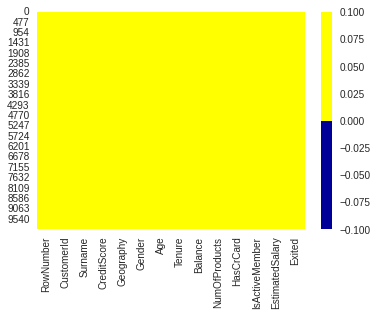

In [21]:
cols = df.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is not missing. blue is  missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

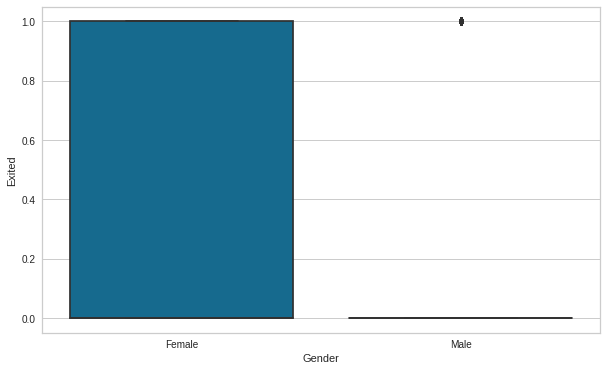

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Gender', y='Exited', data=df, whis=5)
plt.show();

In [23]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
print("There is", df.shape[0], "observation and", df.shape[1], "columns in the dataset")

There is 10000 observation and 14 columns in the dataset


In [25]:
#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

In [ ]:
fig, ax = plt.subplots(nrows=r,ncols=c, figsize=(16,12))
fig.subplots_adjust(left=None,    bottom=None,    right=None,    top=None,    wspace=0.5,    hspace=0.5)

for i,col in enumerate(df.columns[1:]):
    ax[i//2,i%2].hist(df[col])
    ax[i//2,i%2].set_title(col)

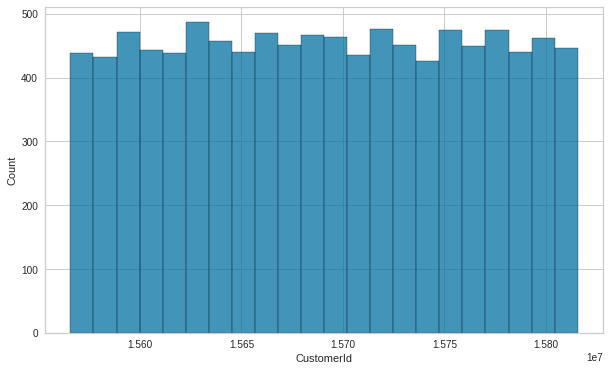

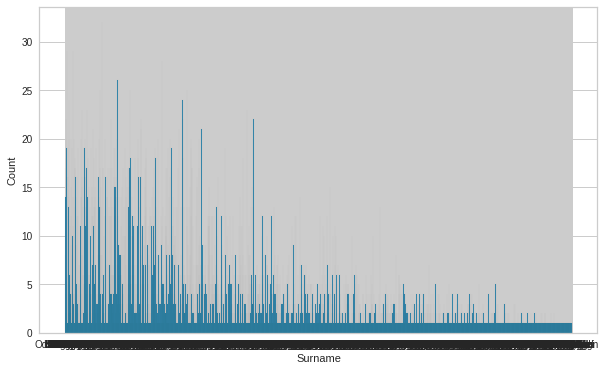

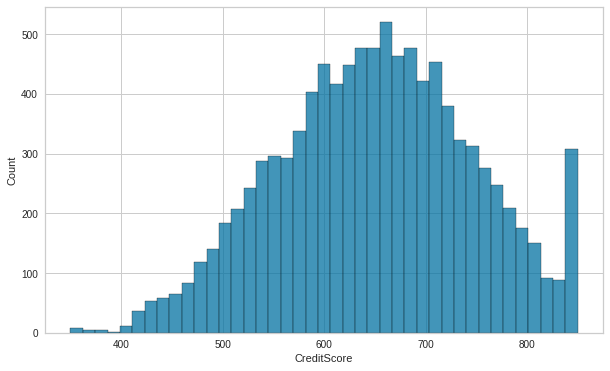

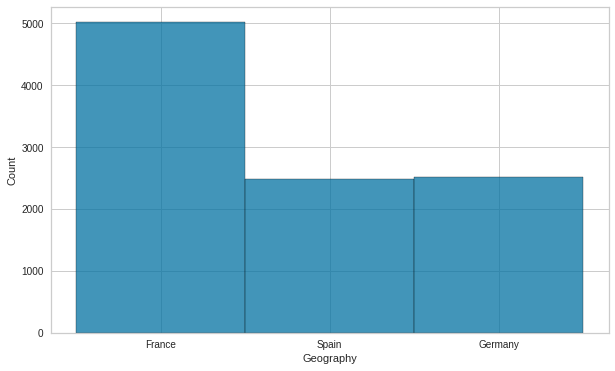

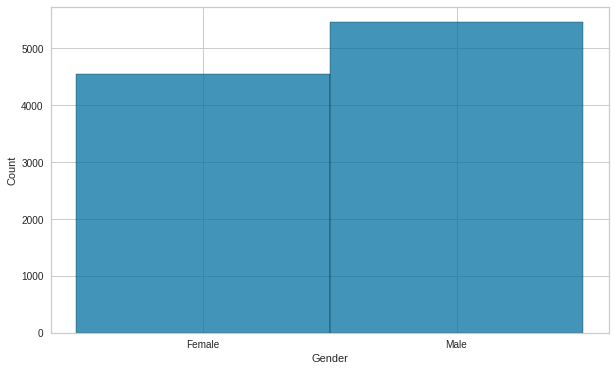

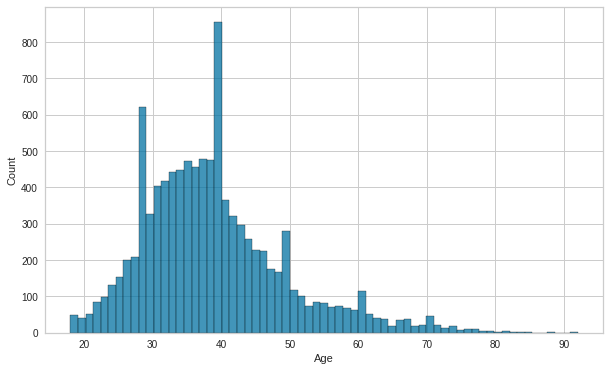

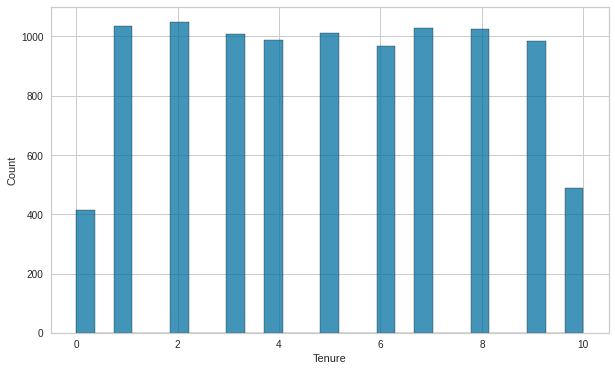

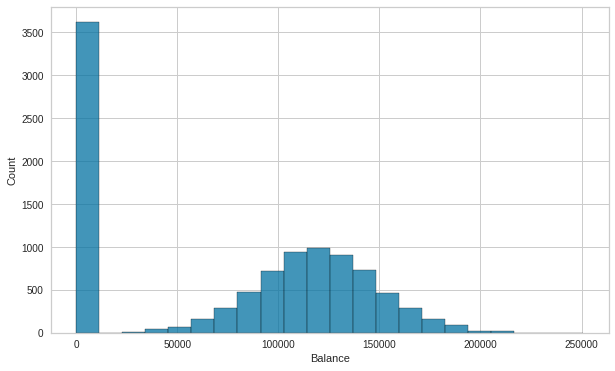

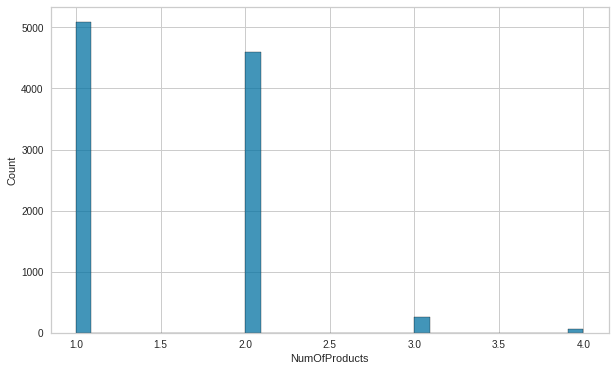

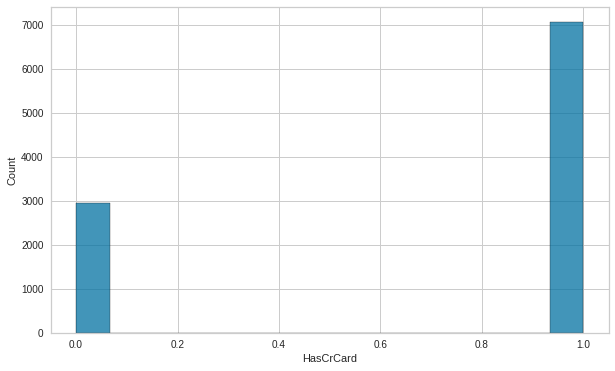

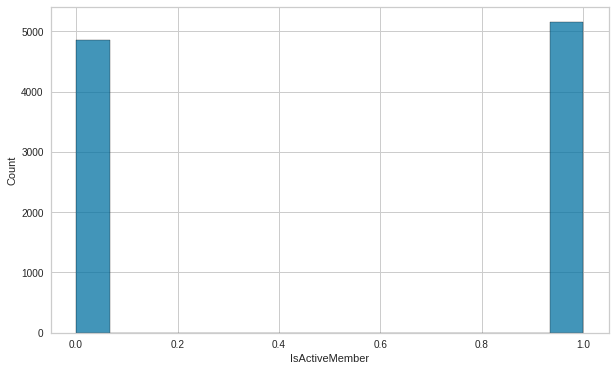

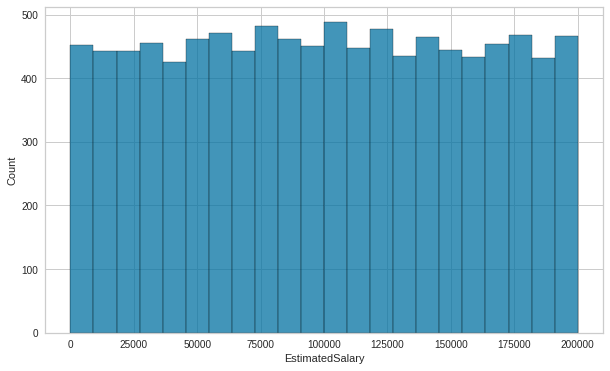

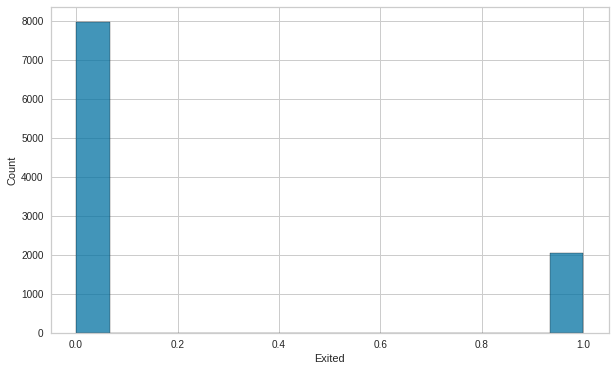

In [27]:
for i,col in enumerate(df.columns[1:]):
    plt.figure(i)
    sns.histplot(df[col])

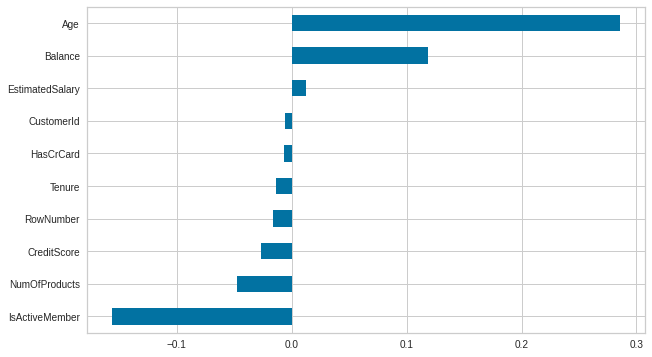

In [28]:
df.corr()["Exited"].drop("Exited").sort_values().plot.barh()

As it shown above as a first look,we can conclude  there is positive weak correlation between Age and Exited column.

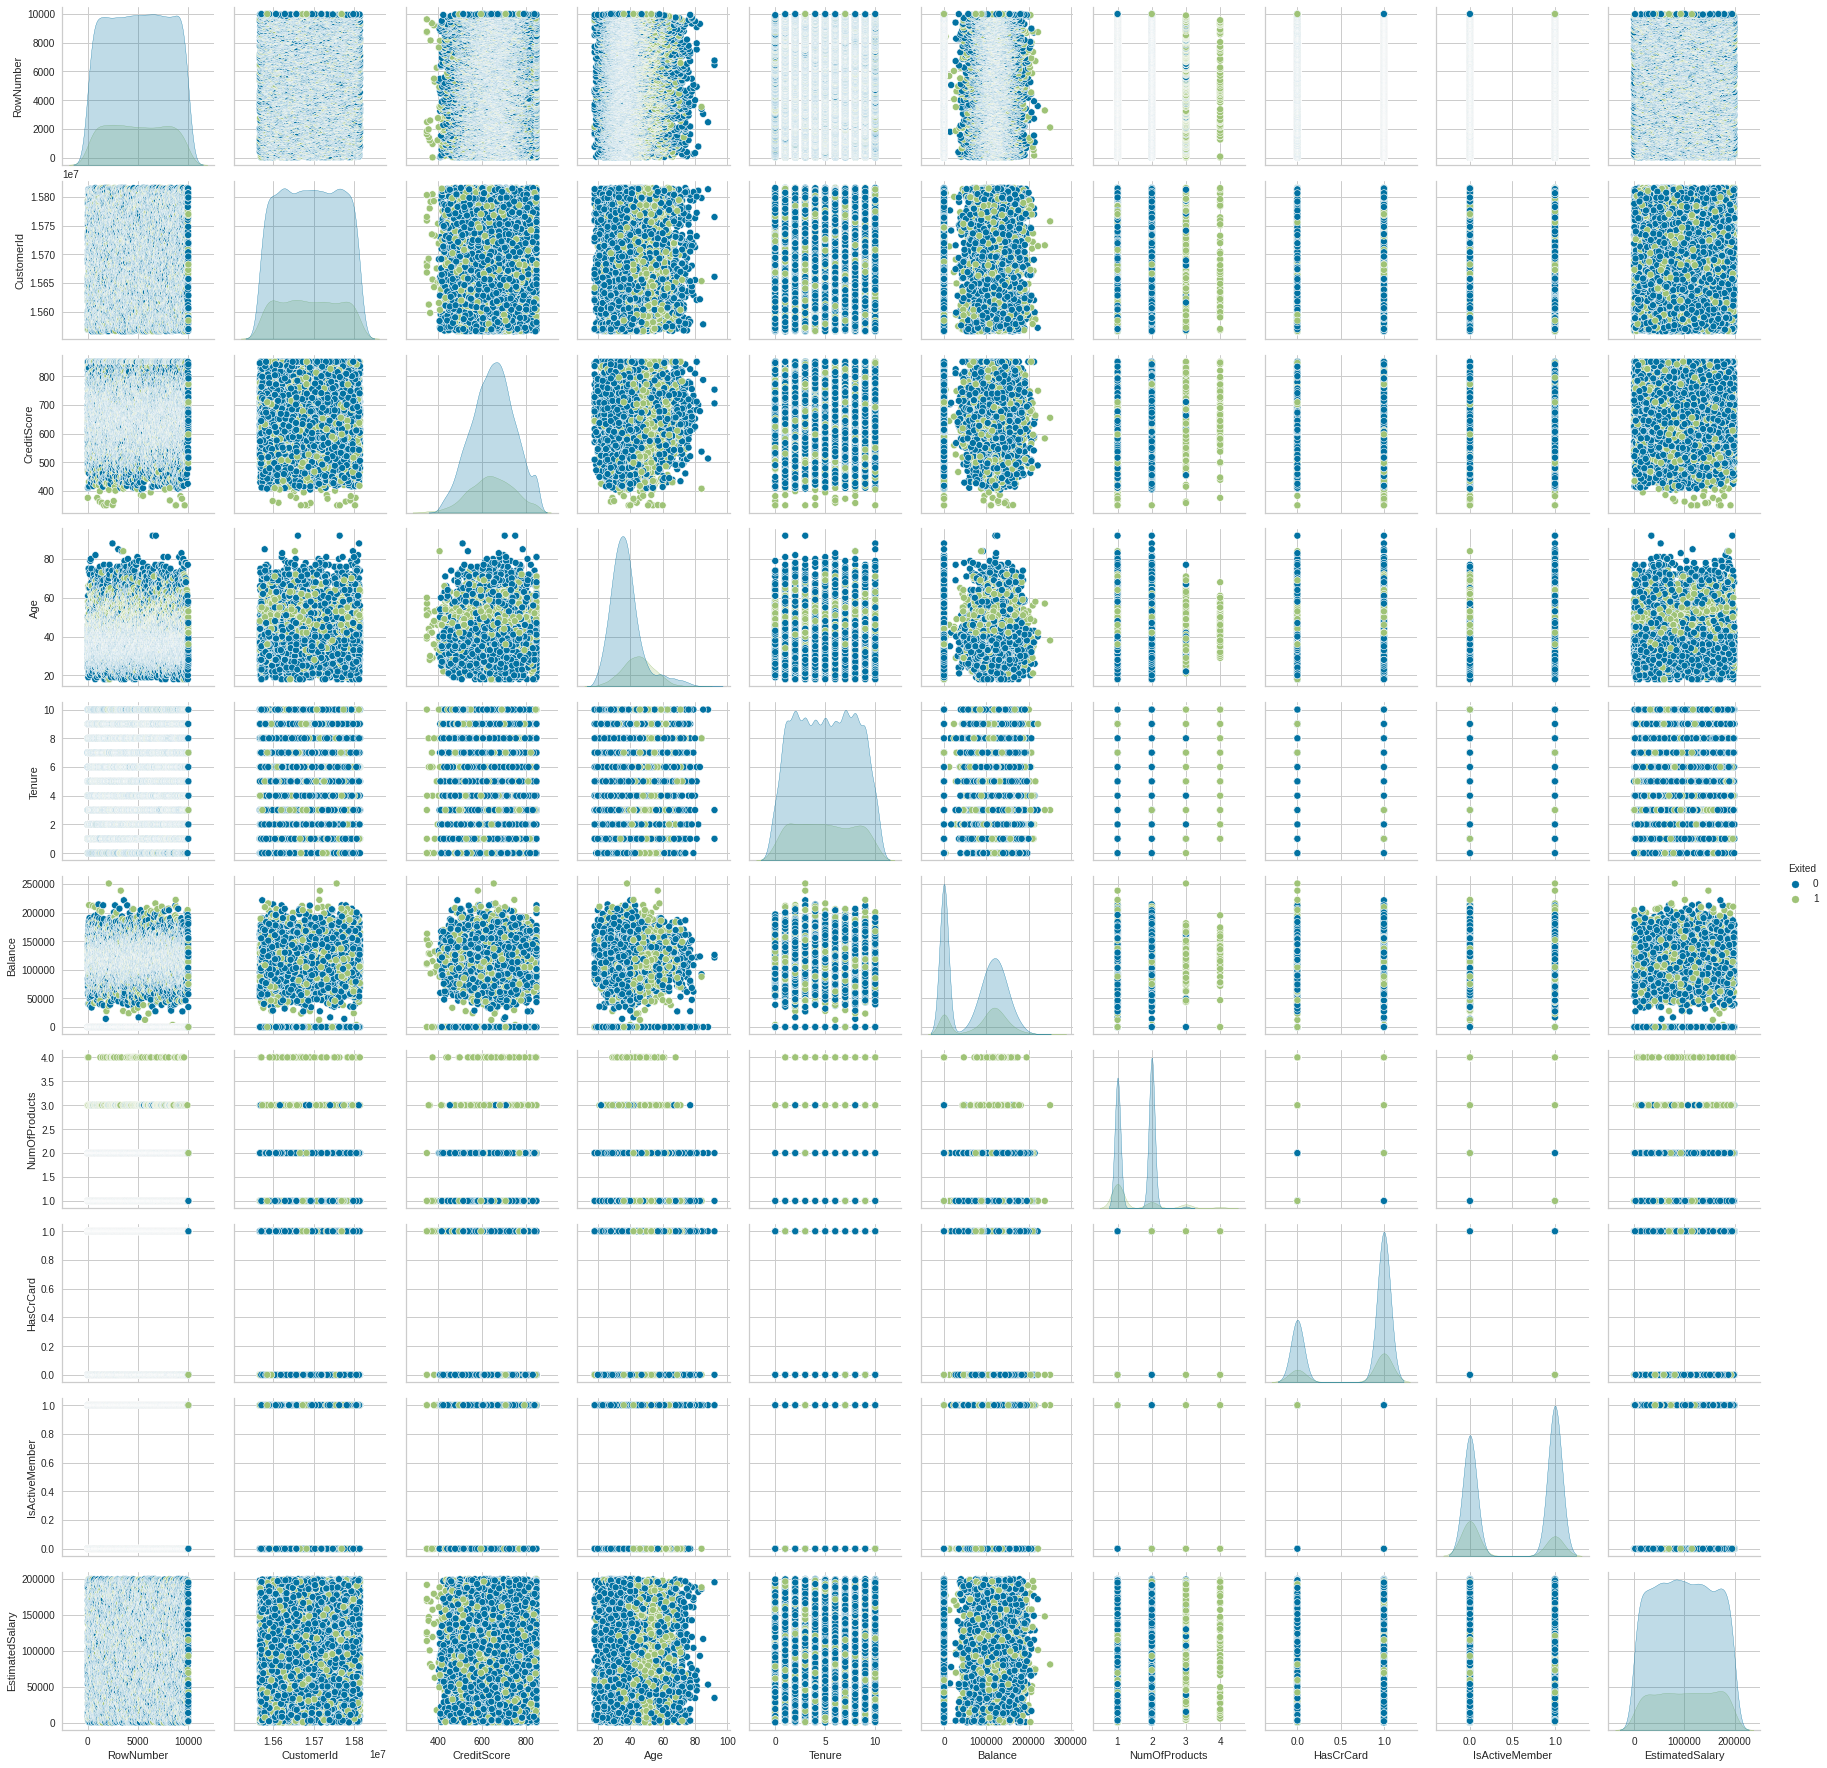

In [29]:
sns.pairplot(df, hue = "Exited")

We can remove the columns of "rownumber", "customerid", "surname" from the given data set since they do not have any contribution to classification of the customer and prediction of the churn customers

In [30]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [31]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu').format('{:.2f}')

Percentage of "being churn": % 20.37 --> (2037 churn cases out of 10000)
Percentage of "NOT being churn": % 79.63 --> (7963 NOT churn cases out of 10000)


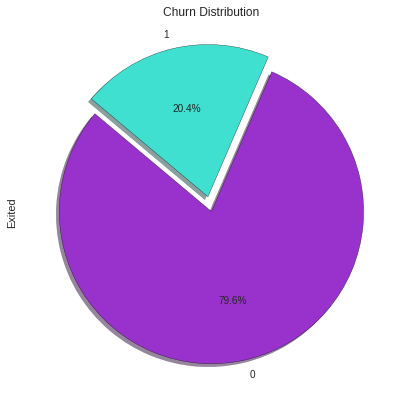

In [32]:
y = df['Exited']

print(f'Percentage of \033[1m"being churn"\033[0m: % {round(y.value_counts(normalize=True)[1]*100,2)} --> \
({y.value_counts()[1]} churn cases out of {len(df)})\nPercentage of \033[1m"NOT being churn"\033[0m: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} NOT churn cases out of {len(df)})')

explode = [0, 0.1]

df["Exited"].value_counts().plot(kind="pie", 
                                 autopct='%1.1f%%', 
                                 figsize=(7, 7), 
                                 explode=explode, 
                                 wedgeprops={'edgecolor': 'black'}, 
                                 shadow=True, 
                                 colors = ['darkorchid', 'turquoise'], 
                                 startangle=140)
plt.title('Churn Distribution');

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(df)
SimpleImputer()
df = pd.DataFrame(imp_mean.transform(df), columns=df.columns)

In [33]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(df[ ['CreditScore', 'Age', 'Tenure' ,'Balance',
 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']])
SimpleImputer()
df[ ['CreditScore', 'Age', 'Tenure' ,'Balance',
 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']] = pd.DataFrame(imp_mean.transform(df[ ['CreditScore', 'Age', 'Tenure' ,'Balance',
 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]), columns=df[ ['CreditScore', 'Age', 'Tenure' ,'Balance',
 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']].columns)

In [34]:
df[ ['CreditScore', 'Age', 'Tenure' ,'Balance',
 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]


CreditScore    Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0         619.000 42.000   2.000      0.000          1.000      1.000   
1         608.000 41.000   1.000  83807.860          1.000      0.000   
2         502.000 42.000   8.000 159660.800          3.000      1.000   
3         699.000 39.000   1.000      0.000          2.000      0.000   
4         850.000 43.000   2.000 125510.820          1.000      1.000   
...           ...    ...     ...        ...            ...        ...   
9995      771.000 39.000   5.000      0.000          2.000      1.000   
9996      516.000 35.000  10.000  57369.610          1.000      1.000   
9997      709.000 36.000   7.000      0.000          1.000      0.000   
9998      772.000 42.000   3.000  75075.310          2.000      1.000   
9999      792.000 28.000   4.000 130142.790          1.000      1.000   

      IsActiveMember  EstimatedSalary  
0              1.000       101348.880  
1              1.000       112542.580  
2              0.000       113931.570  
3              0.000        93826.630  
4              1.000        79084.100  
...              ...              ...  
9995           0.000        96270.640  
9996           1.000       101699.770  
9997           1.000        42085.580  
9998           0.000        92888.520  
9999           0.000        38190.780  

[10000 rows x 8 columns]

In [35]:
try:
    import plotly.express as px

except NameError:
    print("Plotly.express not installed \nPlease install using pip install plotly")

In [ ]:
fig = px.scatter_3d(df, 
                    x='age',
                    y='estimatedsalary',
                    z='creditscore',
                    color='exited')
fig.show();

In [ ]:
for i, col in enumerate(df_non_numeric.columns):
    fig = px.histogram(df[col], color=df["exited"], width=800, height=800, title=col, pattern_shape=df["hascrcard"], pattern_shape_sequence=["x", "+"])
    fig.show()

In [38]:
df.drop(columns=['EstimatedSalary'], axis=1, inplace=True)

In [39]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [40]:
df.head()

CreditScore    Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0      619.000 42.000   2.000      0.000          1.000      1.000   
1      608.000 41.000   1.000  83807.860          1.000      0.000   
2      502.000 42.000   8.000 159660.800          3.000      1.000   
3      699.000 39.000   1.000      0.000          2.000      0.000   
4      850.000 43.000   2.000 125510.820          1.000      1.000   

   IsActiveMember  Exited  Geography_Germany  Geography_Spain  Gender_Male  
0           1.000       1                  0                0            0  
1           1.000       0                  0                1            0  
2           0.000       1                  0                0            0  
3           0.000       0                  0                0            0  
4           1.000       0                  0                1            0

## Preprocessing of Data
- Train | Test Split, Scalling

In [41]:
df.insert(11, 'churn', df['Exited'])

In [42]:
df.drop('Exited', axis=1, inplace=True)

In [ ]:
df.head()

In [43]:
X = df.drop('churn', axis=1)
y = df['churn'].values

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = 42)

## Modelling & Model Performance

In [45]:
scaler = MinMaxScaler()

In [46]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
print(f'X_train.shape is {X_train.shape}')
print(f'X_test.shape is {X_test.shape}')

X_train.shape is (9000, 10)
X_test.shape is (1000, 10)


### Creating Model

Classifiers have a variety of performance metrics. Since churn is very low for most companies, it is not enough to look at the accuracy of the churn model. For example, if the churn is 10% and the churn model for all clients says they will not leave, it will have 90% accuracy. But this is not useful. So, among other things, we need to look at sensitivity (how many of the clients who actually leave were detected by the model) and precision (how many of the clients identified by the model actually left).

In [49]:
model = Sequential()

model.add(Dense(32, activation = "relu"))  # sigunt ve hiperb. e göre öğrenme daha fazla olduğu için relu kullandık.
model.add(Dense(16, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))  # output binary olduğu için sigmoid kullandık. 

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [51]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 10)

In [53]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 40, verbose = 1,
          callbacks = [early_stop])

Epoch 1/40
254/254 [==============================] - 2s 7ms/step - loss: 0.3473 - accuracy: 0.8565 - val_loss: 0.3050 - val_accuracy: 0.8789
Epoch 2/40
254/254 [==============================] - 2s 6ms/step - loss: 0.3472 - accuracy: 0.8559 - val_loss: 0.3039 - val_accuracy: 0.8856
Epoch 3/40
254/254 [==============================] - 2s 6ms/step - loss: 0.3474 - accuracy: 0.8562 - val_loss: 0.3039 - val_accuracy: 0.8867
Epoch 4/40
254/254 [==============================] - 2s 6ms/step - loss: 0.3458 - accuracy: 0.8547 - val_loss: 0.3059 - val_accuracy: 0.8833
Epoch 5/40
254/254 [==============================] - 2s 6ms/step - loss: 0.3458 - accuracy: 0.8564 - val_loss: 0.3047 - val_accuracy: 0.8900
Epoch 6/40
254/254 [==============================] - 2s 6ms/step - loss: 0.3448 - accuracy: 0.8581 - val_loss: 0.3043 - val_accuracy: 0.8856
Epoch 7/40
254/254 [==============================] - 2s 6ms/step - loss: 0.3457 - accuracy: 0.8568 - val_loss: 0.3106 - val_accuracy: 0.8833
Epoch 

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


In [57]:
from tensorflow.keras.utils import plot_model

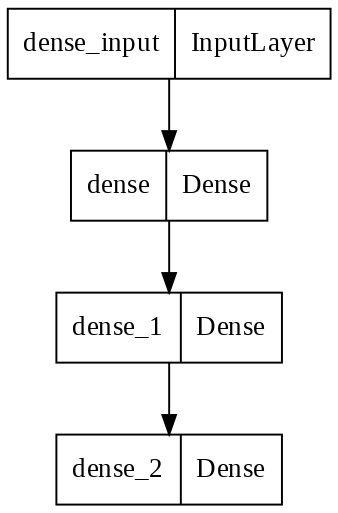

In [58]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))
plot_model(model, to_file='model.png',dpi=140)

In [59]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

loss  accuracy  val_loss  val_accuracy
0 0.347     0.857     0.305         0.879
1 0.347     0.856     0.304         0.886
2 0.347     0.856     0.304         0.887
3 0.346     0.855     0.306         0.883
4 0.346     0.856     0.305         0.890

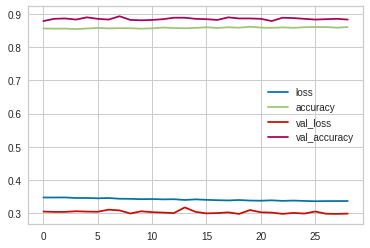

In [60]:
loss_df.plot();

In [61]:
model.evaluate(X_test, y_test, verbose=0)

[0.34534311294555664, 0.8529999852180481]

In [62]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.34534311294555664
accuracy :  0.8529999852180481


In [63]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")   

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[763  33]
 [114  90]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.73      0.44      0.55       204

    accuracy                           0.85      1000
   macro avg       0.80      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000



##Modelling With "class_weigth"

In [64]:
from sklearn.utils import class_weight

In [65]:
class_weights = class_weight.compute_class_weight( 'balanced', classes=np.unique(y_train),  y=y_train)

In [ ]:
class_weights


In [66]:
model_weighted = Sequential()

model_weighted.add(Dense(32, activation = "relu"))  
model_weighted.add(Dense(16, activation = "relu"))
model_weighted.add(Dense(1, activation = "sigmoid"))  

opt = Adam(lr = 0.005)

model_weighted.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [67]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 10)
class_weight = {0: 0.62787777, 1: 2.45499182}  


In [68]:
model_weighted.fit(x = X_train, y = y_train, 
                   validation_split = 0.1, 
                   batch_size = 32, 
                   epochs = 100, 
                   verbose=1, 
                   callbacks = [early_stop], 
                   class_weight=class_weight)

Epoch 1/100
254/254 [==============================] - 2s 5ms/step - loss: 0.6054 - accuracy: 0.6673 - val_loss: 0.4555 - val_accuracy: 0.8122
Epoch 2/100
254/254 [==============================] - 1s 4ms/step - loss: 0.5270 - accuracy: 0.7406 - val_loss: 0.5615 - val_accuracy: 0.7111
Epoch 3/100
254/254 [==============================] - 1s 4ms/step - loss: 0.5077 - accuracy: 0.7589 - val_loss: 0.5927 - val_accuracy: 0.6744
Epoch 4/100
254/254 [==============================] - 1s 5ms/step - loss: 0.4989 - accuracy: 0.7530 - val_loss: 0.4833 - val_accuracy: 0.7644
Epoch 5/100
254/254 [==============================] - 1s 4ms/step - loss: 0.4916 - accuracy: 0.7636 - val_loss: 0.4166 - val_accuracy: 0.8167
Epoch 6/100
254/254 [==============================] - 1s 4ms/step - loss: 0.4892 - accuracy: 0.7667 - val_loss: 0.5121 - val_accuracy: 0.7244
Epoch 7/100
254/254 [==============================] - 1s 5ms/step - loss: 0.4826 - accuracy: 0.7651 - val_loss: 0.4363 - val_accuracy: 0.8078

In [69]:
model_weighted.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                352       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


In [70]:
loss_df = pd.DataFrame(model_weighted.history.history)
loss_df.head()

loss  accuracy  val_loss  val_accuracy
0 0.605     0.667     0.456         0.812
1 0.527     0.741     0.562         0.711
2 0.508     0.759     0.593         0.674
3 0.499     0.753     0.483         0.764
4 0.492     0.764     0.417         0.817

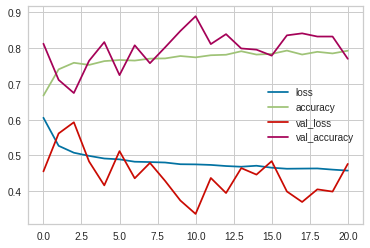

In [71]:
loss_df.plot();

In [72]:
model_weighted.evaluate(X_test, y_test, verbose=0)

[0.5118200778961182, 0.7519999742507935]

In [73]:
loss, accuracy = model_weighted.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.5118200778961182
accuracy :  0.7519999742507935


In [74]:
y_pred = (model_weighted.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[582 214]
 [ 34 170]]
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       796
           1       0.44      0.83      0.58       204

    accuracy                           0.75      1000
   macro avg       0.69      0.78      0.70      1000
weighted avg       0.84      0.75      0.77      1000



## GridSearchCV

In [75]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 32, activation = 'relu'))
    classifier.add(Dense(units = 16, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [76]:
early_stop = EarlyStopping(monitor = "accuracy", mode = "auto", verbose = 1, patience = 10)
class_weight = {0: 0.62787777, 1: 2.45499182}
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)

parameters = {'batch_size': [32, 64],
              'optimizer': ['adam', 'rmsprop', "SGD", "adagrad", "adadelta"]}

grid_model = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop], class_weight = class_weight)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 42.9min


Epoch 1/100


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 68.4min finished


282/282 [==============================] - 2s 4ms/step - loss: 0.6551 - accuracy: 0.6657
Epoch 2/100
282/282 [==============================] - 1s 4ms/step - loss: 0.6099 - accuracy: 0.6778
Epoch 3/100
282/282 [==============================] - 1s 4ms/step - loss: 0.5872 - accuracy: 0.6851
Epoch 4/100
282/282 [==============================] - 1s 4ms/step - loss: 0.5722 - accuracy: 0.6964
Epoch 5/100
282/282 [==============================] - 1s 4ms/step - loss: 0.5600 - accuracy: 0.7122
Epoch 6/100
282/282 [==============================] - 1s 4ms/step - loss: 0.5480 - accuracy: 0.7214
Epoch 7/100
282/282 [==============================] - 1s 4ms/step - loss: 0.5354 - accuracy: 0.7384
Epoch 8/100
282/282 [==============================] - 1s 4ms/step - loss: 0.5217 - accuracy: 0.7474
Epoch 9/100
282/282 [==============================] - 1s 4ms/step - loss: 0.5098 - accuracy: 0.7553
Epoch 10/100
282/282 [==============================] - 1s 4ms/step - loss: 0.4979 - accuracy: 0.7674
E

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f9e83f0eed0>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'optimizer': ['adam', 'rmsprop', 'SGD', 'adagrad',
                                       'adadelta']},
             scoring='accuracy', verbose=1)

In [77]:
grid_model.best_score_

0.799888888888889

In [78]:
grid_model.best_params_

{'batch_size': 32, 'optimizer': 'rmsprop'}

In [79]:
y_pred = (grid_model.predict(X_test) > 0.5).astype("int32")

In [80]:
print(confusion_matrix(y_test, y_pred))

[[626 170]
 [ 50 154]]


In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85       796
           1       0.48      0.75      0.58       204

    accuracy                           0.78      1000
   macro avg       0.70      0.77      0.72      1000
weighted avg       0.83      0.78      0.80      1000



In [82]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [83]:
roc_auc_score(y_test, y_pred_proba)

0.8563220514336388

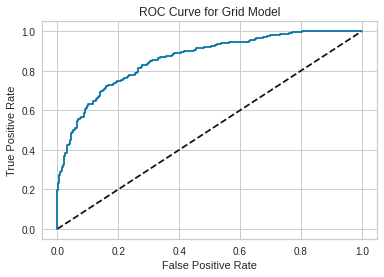

In [84]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Grid Model')
plt.show()

In [85]:
roc_auc_score(y_test, y_pred_proba)

0.8602325352251454

## 2)CLUSTER ANALYSIS

In [86]:
df1=df.copy()

In [87]:
scaler = MinMaxScaler()
scaler.fit(df1)

#Store it separately for clustering
df1_scaled= scaler.transform(df1)

In [88]:
hopkins(df1_scaled, df1.shape[0])

0.1262035553041912

OSError: ignored

OSError: ignored

OSError: ignored

OSError: ignored

OSError: ignored

OSError: ignored

OSError: ignored

OSError: ignored

OSError: ignored

OSError: ignored

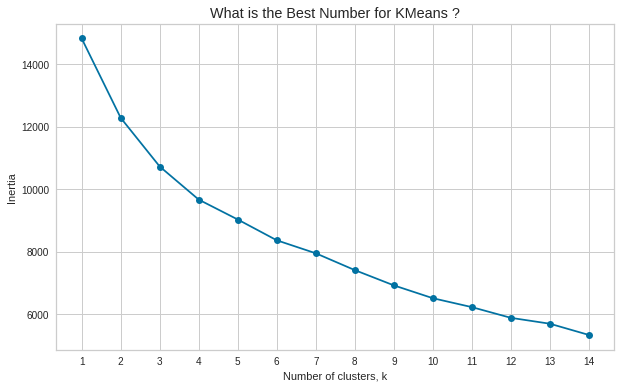

In [89]:
#First : Get the Best KMeans 
ks = range(1,15)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k,random_state=1)
    kc.fit(df1_scaled)
    inertias.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(10, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (1,15))
visu.fit(df1_scaled)
visu.show();

In [91]:
from sklearn.metrics import silhouette_samples,silhouette_score

ssd =[]

K = range(2, 15)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df1_scaled)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df1_scaled, model.labels_)}')

Silhouette Score for 2 clusters: 0.17696658950598254
Silhouette Score for 3 clusters: 0.19086738332259398
Silhouette Score for 4 clusters: 0.1730245191911742
Silhouette Score for 5 clusters: 0.19638619293988835
Silhouette Score for 6 clusters: 0.18117551846577434
Silhouette Score for 7 clusters: 0.1996864690980728
Silhouette Score for 8 clusters: 0.21966939791509996
Silhouette Score for 9 clusters: 0.21068372857614068
Silhouette Score for 10 clusters: 0.22900084816800345
Silhouette Score for 11 clusters: 0.23444185003226356
Silhouette Score for 12 clusters: 0.26571222514363374
Silhouette Score for 13 clusters: 0.25549226106491385
Silhouette Score for 14 clusters: 0.2773750247871168


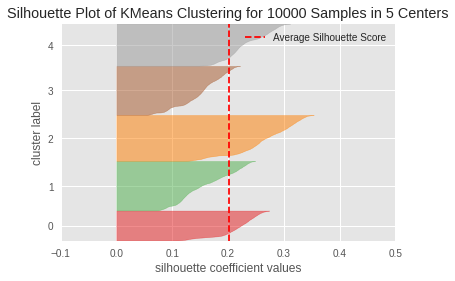

In [92]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model_4 = KMeans(n_clusters=5, random_state=101)
visualizer = SilhouetteVisualizer(model_4)
visualizer.fit(df1_scaled)    # Fit the data to the visualizer
visualizer.poof();

In [93]:
k_means_model = KMeans(n_clusters = 5, random_state = 101)
k_means_model.fit_predict(df1_scaled)
labels = k_means_model.labels_
labels

array([1, 1, 3, ..., 1, 4, 3], dtype=int32)

In [94]:
df['predicted_clusters'] = labels
df

CreditScore    Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0         619.000 42.000   2.000      0.000          1.000      1.000   
1         608.000 41.000   1.000  83807.860          1.000      0.000   
2         502.000 42.000   8.000 159660.800          3.000      1.000   
3         699.000 39.000   1.000      0.000          2.000      0.000   
4         850.000 43.000   2.000 125510.820          1.000      1.000   
...           ...    ...     ...        ...            ...        ...   
9995      771.000 39.000   5.000      0.000          2.000      1.000   
9996      516.000 35.000  10.000  57369.610          1.000      1.000   
9997      709.000 36.000   7.000      0.000          1.000      0.000   
9998      772.000 42.000   3.000  75075.310          2.000      1.000   
9999      792.000 28.000   4.000 130142.790          1.000      1.000   

      IsActiveMember  Geography_Germany  Geography_Spain  Gender_Male  churn  \
0              1.000                  0                0            0      1   
1              1.000                  0                1            0      0   
2              0.000                  0                0            0      1   
3              0.000                  0                0            0      0   
4              1.000                  0                1            0      0   
...              ...                ...              ...          ...    ...   
9995           0.000                  0                0            1      0   
9996           1.000                  0                0            1      0   
9997           1.000                  0                0            0      1   
9998           0.000                  1                0            1      1   
9999           0.000                  0                0            0      0   

      predicted_clusters  
0                      1  
1                      1  
2                      3  
3                      3  
4                      1  
...                  ...  
9995                   4  
9996                   2  
9997                   1  
9998                   4  
9999                   3  

[10000 rows x 12 columns]

In [ ]:
fig = px.pie(df, values = df['predicted_clusters'].value_counts(), 
             names = (df['predicted_clusters'].value_counts()).index, 
             title = 'Predicted_Clusters Distribution')
fig.show()

In [ ]:
pd.crosstab(df['churn'], 
            df['predicted_clusters']).iplot(kind="bar", title = 'Compare (churn vs predicted-clusters)',
            xTitle = 'left & clusters', yTitle = 'counts')

In [97]:
df.groupby('churn').mean()

CreditScore    Age  Tenure   Balance  NumOfProducts  HasCrCard  \
churn                                                                   
0          651.853 37.408   5.033 72745.297          1.544      0.707   
1          645.351 44.838   4.933 91108.539          1.475      0.699   

       IsActiveMember  Geography_Germany  Geography_Spain  Gender_Male  \
churn                                                                    
0               0.555              0.213            0.259        0.573   
1               0.361              0.400            0.203        0.441   

       predicted_clusters  
churn                      
0                   2.030  
1                   2.425

In [98]:
# cprint('Dataset describe results according to the "left==1" condition','green')

df.groupby(['churn', 'predicted_clusters']).mean()

CreditScore    Age  Tenure    Balance  \
churn predicted_clusters                                          
0     0                       651.115 37.716   5.123  61871.626   
      1                       653.850 38.914   4.909  71094.793   
      2                       654.214 38.880   4.962  78572.108   
      3                       650.083 35.515   5.060  71291.081   
      4                       648.822 35.383   5.178  77830.525   
1     0                       650.176 44.830   4.626  73167.868   
      1                       644.882 44.659   4.874  91292.010   
      2                       648.389 44.946   4.848  96305.477   
      3                       648.026 44.857   4.967  87748.745   
      4                       637.937 44.913   5.100 100453.819   

                          NumOfProducts  HasCrCard  IsActiveMember  \
churn predicted_clusters                                             
0     0                           1.529      0.687           0.568   
      1                           1.540      0.703           1.000   
      2                           1.546      0.718           1.000   
      3                           1.574      0.705           0.000   
      4                           1.529      0.716           0.000   
1     0                           1.407      0.665           0.352   
      1                           1.565      0.657           1.000   
      2                           1.525      0.658           1.000   
      3                           1.480      0.721           0.000   
      4                           1.386      0.739           0.000   

                          Geography_Germany  Geography_Spain  Gender_Male  
churn predicted_clusters                                                   
0     0                               0.000            1.000        1.000  
      1                               0.211            0.260        0.000  
      2                               0.300            0.000        1.000  
      3                               0.229            0.243        0.000  
      4                               0.263            0.000        1.000  
1     0                               0.000            1.000        1.000  
      1                               0.399            0.186        0.000  
      2                               0.510            0.000        1.000  
      3                               0.390            0.212        0.000  
      4                               0.512            0.000        1.000

In [99]:
df.drop('predicted_clusters', axis=1, inplace=True)

##1)KNN Classifier

In [100]:
KNN_model = KNeighborsClassifier(n_neighbors = 5)
KNN_model.fit(X_train, y_train)
y_pred = KNN_model.predict(X_test)
y_train_pred = KNN_model.predict(X_train)

KNN_model_f1 = f1_score(y_test, y_pred)
KNN_model_acc = accuracy_score(y_test, y_pred)
KNN_model_recall = recall_score(y_test, y_pred)
KNN_model_auc = roc_auc_score(y_test, y_pred)

KNN_Model
------------------
[[758  38]
 [130  74]]
Test_Set
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       796
           1       0.66      0.36      0.47       204

    accuracy                           0.83      1000
   macro avg       0.76      0.66      0.68      1000
weighted avg       0.81      0.83      0.81      1000

Train_Set
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      7167
           1       0.80      0.53      0.64      1833

    accuracy                           0.88      9000
   macro avg       0.84      0.75      0.78      9000
weighted avg       0.87      0.88      0.87      9000



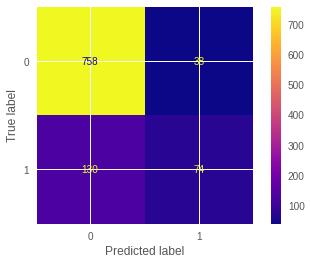

In [101]:
print("KNN_Model")
print ("------------------")
eval(KNN_model, X_train, X_test)

In [102]:
train_val(y_train, y_train_pred, y_test, y_pred)

train_set  test_set
Accuracy       0.877     0.832
Precision      0.797     0.661
Recall         0.529     0.363
f1             0.636     0.468

In [ ]:
Model_Preds = pd.merge(Model_Preds, KNN_Pred, left_index = True, right_index = True)
Model_Preds.head(20)

##2) Random Forest Classifier 

In [104]:
df2 = df.copy()
df2.head(1)

CreditScore    Age  Tenure  Balance  NumOfProducts  HasCrCard  \
0      619.000 42.000   2.000    0.000          1.000      1.000   

   IsActiveMember  Geography_Germany  Geography_Spain  Gender_Male  churn  
0           1.000                  0                0            0      1

In [105]:
X = df2.drop('churn', axis = 1)
y = df2['churn']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 42)

In [107]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [108]:
RF_model = RandomForestClassifier(class_weight = "balanced", random_state = 101)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
y_train_pred = RF_model.predict(X_train)

RF_model_f1 = f1_score(y_test, y_pred)
RF_model_acc = accuracy_score(y_test, y_pred)
RF_model_recall = recall_score(y_test, y_pred)
RF_model_auc = roc_auc_score(y_test, y_pred)

RF_Model
------------------
[[2294   95]
 [ 333  278]]
Test_Set
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2389
           1       0.75      0.45      0.57       611

    accuracy                           0.86      3000
   macro avg       0.81      0.71      0.74      3000
weighted avg       0.85      0.86      0.84      3000

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5574
           1       1.00      1.00      1.00      1426

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



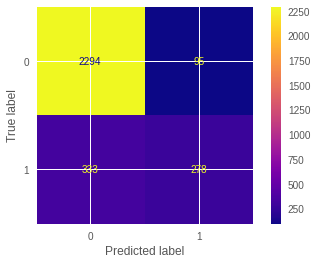

In [109]:
print("RF_Model")
print ("------------------")
eval(RF_model, X_train, X_test)

#Pycaret

In [ ]:
!pip install pycaret

In [111]:
from pycaret.classification import *

employee_clf = setup(df2, target = 'churn', 
                     session_id = 123, 
                     train_size=0.8, 
                     log_experiment=True, 
                     log_plots=True, 
                     experiment_name = 'employee_churn_model')

Description                 Value
0                               session_id                   123
1                                   Target                 churn
2                              Target Type                Binary
3                            Label Encoded                  None
4                            Original Data           (10000, 11)
5                           Missing Values                 False
6                         Numeric Features                     8
7                     Categorical Features                     2
8                         Ordinal Features                 False
9                High Cardinality Features                 False
10                 High Cardinality Method                  None
11                   Transformed Train Set            (8000, 10)
12                    Transformed Test Set            (2000, 10)
13                      Shuffle Train-Test                  True
14                     Stratify Train-Test                 False
15                          Fold Generator       StratifiedKFold
16                             Fold Number                    10
17                                CPU Jobs                    -1
18                                 Use GPU                 False
19                          Log Experiment                  True
20                         Experiment Name  employee_churn_model
21                                     USI                  51b8
22                         Imputation Type                simple
23          Iterative Imputation Iteration                  None
24                         Numeric Imputer                  mean
25      Iterative Imputation Numeric Model                  None
26                     Categorical Imputer              constant
27  Iterative Imputation Categorical Model                  None
28           Unknown Categoricals Handling        least_frequent
29                               Normalize                 False
30                        Normalize Method                  None
31                          Transformation                 False
32                   Transformation Method                  None
33                                     PCA                 False
34                              PCA Method                  None
35                          PCA Components                  None
36                     Ignore Low Variance                 False
37                     Combine Rare Levels                 False
38                    Rare Level Threshold                  None
39                         Numeric Binning                 False
40                         Remove Outliers                 False
41                      Outliers Threshold                  None
42                Remove Multicollinearity                 False
43             Multicollinearity Threshold                  None
44             Remove Perfect Collinearity                  True
45                              Clustering                 False
46                    Clustering Iteration                  None
47                     Polynomial Features                 False
48                       Polynomial Degree                  None
49                    Trignometry Features                 False
50                    Polynomial Threshold                  None
51                          Group Features                 False
52                       Feature Selection                 False
53                Feature Selection Method               classic
54            Features Selection Threshold                  None
55                     Feature Interaction                 False
56                           Feature Ratio                 False
57                   Interaction Threshold                  None
58                           Fix Imbalance                 False
59                    Fix Imbalance Method                 SMOTE

##3-Gradient Boosting

In [112]:
GB_model = GradientBoostingClassifier(random_state = 101)
GB_model.fit(X_train, y_train)
y_pred = GB_model.predict(X_test)
y_train_pred = GB_model.predict(X_train)

GB_model_f1 = f1_score(y_test, y_pred)
GB_model_acc = accuracy_score(y_test, y_pred)
GB_model_recall = recall_score(y_test, y_pred)
GB_model_auc = roc_auc_score(y_test, y_pred)

GB_Model
------------------
[[2308   81]
 [ 311  300]]
Test_Set
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2389
           1       0.79      0.49      0.60       611

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000

Train_Set
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5574
           1       0.81      0.48      0.60      1426

    accuracy                           0.87      7000
   macro avg       0.84      0.72      0.76      7000
weighted avg       0.86      0.87      0.86      7000



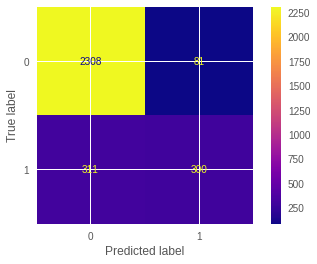

In [113]:
print("GB_Model")
print ("------------------")
eval(GB_model, X_train, X_test)

### Feature Importance for Gradient Boosting Model

In [114]:
GB_feature_imp = pd.DataFrame(index=X.columns, data = GB_model.feature_importances_, columns = ['Importance']).sort_values("Importance", ascending = False)
GB_feature_imp

Importance
Age                     0.382
NumOfProducts           0.307
IsActiveMember          0.112
Balance                 0.105
Geography_Germany       0.056
CreditScore             0.023
Gender_Male             0.012
Tenure                  0.003
Geography_Spain         0.001
HasCrCard               0.001

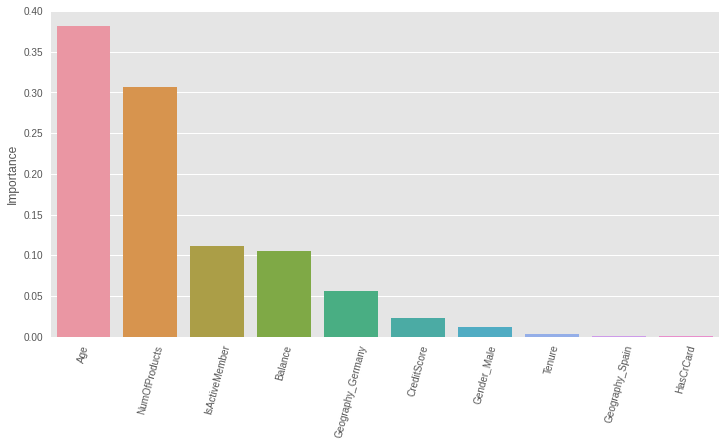

In [115]:
plt.figure(figsize = (12,6))
sns.barplot(data = GB_feature_imp.sort_values('Importance', ascending = False), x = GB_feature_imp.sort_values('Importance', ascending = False).index, y = 'Importance')
plt.xticks(rotation = 75);

## Final Model and Model Deployment

In [119]:
import pickle

In [120]:
pickle.dump(scaler, open("scaler_churn", 'wb'))

In [121]:
final_model = Sequential()

final_model.add(Dense(32, activation = "relu"))
final_model.add(Dense(16, activation = "relu"))
final_model.add(Dense(1, activation = "sigmoid"))  

opt = Adam(lr = 0.005)

final_model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 10)
class_weight = {0: 0.62787777, 1: 2.45499182}
final_model.fit(x = X_train, y = y_train, 
                validation_data = (X_test, y_test), 
                batch_size = 32, 
                epochs = 100, 
                verbose = 1, 
                callbacks = [early_stop], 
                class_weight = class_weight)


Epoch 1/100
219/219 [==============================] - 3s 9ms/step - loss: 0.6295 - accuracy: 0.6380 - val_loss: 0.5944 - val_accuracy: 0.6870
Epoch 2/100
219/219 [==============================] - 2s 9ms/step - loss: 0.5847 - accuracy: 0.6969 - val_loss: 0.5600 - val_accuracy: 0.7207
Epoch 3/100
219/219 [==============================] - 2s 9ms/step - loss: 0.5369 - accuracy: 0.7387 - val_loss: 0.5497 - val_accuracy: 0.7223
Epoch 4/100
219/219 [==============================] - 2s 10ms/step - loss: 0.5077 - accuracy: 0.7547 - val_loss: 0.4540 - val_accuracy: 0.7803
Epoch 5/100
219/219 [==============================] - 2s 11ms/step - loss: 0.4990 - accuracy: 0.7621 - val_loss: 0.5108 - val_accuracy: 0.7427
Epoch 6/100
219/219 [==============================] - 2s 9ms/step - loss: 0.4920 - accuracy: 0.7639 - val_loss: 0.4461 - val_accuracy: 0.7867
Epoch 7/100
219/219 [==============================] - 2s 8ms/step - loss: 0.4862 - accuracy: 0.7726 - val_loss: 0.5244 - val_accuracy: 0.73

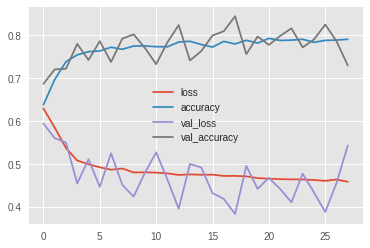

In [122]:
loss_df = pd.DataFrame(final_model.history.history)
loss_df.plot();

In [123]:
y_pred = (final_model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1679  710]
 [ 100  511]]
              precision    recall  f1-score   support

           0       0.94      0.70      0.81      2389
           1       0.42      0.84      0.56       611

    accuracy                           0.73      3000
   macro avg       0.68      0.77      0.68      3000
weighted avg       0.84      0.73      0.76      3000



In [129]:
pickle.dump(final_model, open("model_churn.h5", "wb"))

INFO:tensorflow:Assets written to: ram://8e90b984-52c6-4e3d-9da3-72d66ba86cc1/assets


In [128]:
model.save('model_churn.h5')

AttributeError: ignored

### Prediction

###loading model ans scaler

In [126]:
from tensorflow.keras.models import load_model

In [ ]:
model_churn = load_model('model_churn.h5')
scaler_churn = pickle.load(open("scaler_churn", "rb"))

In [ ]:
random_ten_customer = df.sample(n=10, random_state=101).iloc[0:10, :11]
random_ten_customer

In [ ]:
random_ten_customer = scaler_churn.transform(random_ten_customer)
random_ten_customer

In [ ]:
prediction = pd.DataFrame(model_churn.predict(random_ten_customer) > 0.5, columns=['prediction']).astype("float64")
prediction

In [ ]:
actual = pd.DataFrame(df.sample(n=10, random_state=101)["churn"]).rename({'churn': 'actual'}, axis=1).astype("float64")
actual

In [ ]:
pred_df['prediction_accuracy'] = pred_df.apply(lambda x: "TRUE" if int(x['actual'] == x['prediction']) else "FALSE", axis=1)
pred_df

Customers on an annual plan tend to stick around longer than those paying monthly. With an annual plan, customers tend to form deeper relationships with brands. The longer customers have to see the value your service provides, the more likely they’ll stick around.

Open up multiple communication channels—in-app notifications, email, phone calls—to connect with customers. Having more than one channel gives customers options and tailors your message to their preferred communication method.

A recovery email is a message you send to customers after they’ve canceled, to try and win them back. These emails are an opportunity to remind customers of the value your service provides so they see what they’re missing out on.

While building Retain, our revenue retention tool, we found that recovery emails save up to 77% of customers contacted through Retain’s dunning processes.

You have to provide enough good quality educational or support materials, which will help increase retention and reduce churn. Offer free trainings, webinars, video tutorials, and product demos – whatever it takes to make your customers feel comfortable and informed.

In other words, you have to not only to give them the tools that work, but also offer the training on how to use these tools at a maximum profit. In this way you will demonstrate the full potential of your products and services, and ensure that customers have a successful onboarding and implementation.

Another advisable tip is to offer incentives, such as discounts and special offers, to those customers who were identified as likely to defect.
 
 For example, we can reach out to these clients with a marketing campaign, reminding them that they haven’t purchased from us in a while, or even offering them a benefit.


 
In addition to knowing which clients to target, we can use the churn model to calculate the maximum benefit price that is still worthwhile. For example, if we know that the estimated probability of a particular client leaving is 10% and their annual revenue is $100, the expected value of future annual revenue is $90. Therefore, an offer that typically reduces the probability of leaving to 5% (the expected value of the revenue is then $95) will be worthwhile for this client, so long as it does not cost more than $5.
What do we need for the churn model?
Like any supervised machine learning model, a churn model needs training data with response (target) and explanatory variables (features). Based on this training data, the model learns to best capture the relationship between features and target.
Typically, this is historical data, where we know which clients eventually left and which did not. Those who left have a positive target (yes, they left). Others have a negative target (no, they didn’t leave). Whilst features describe clients at a point in time when that outcome was not yet known.
A properly defined target is fundamentally key. In many cases this is simple (e.g., cancellation of last product), sometimes less so (e.g., no transactions in the last three months). However, it is possible to apply the churn model to both contractual (e.g., bank) and non-contractual (e.g., e-shop) client relationships.
Features include any data that can help identify clients who churn. Often this includes socio-demographic data, data on products owned, historical transactions, client-company interaction, e-commerce behaviour, and so on.
It is also important to be careful about how far in advance we want to estimate the propensity to leave. In other words, how long is the time between the day we look at clients through the available features and the day we can tell if they have left? If that time is too short, we won’t have much time to make any kind of response. If, on the other hand, it is too long, the model will be less accurate and up to date.
What does such a model look like?
Modern churn models are often based on machine learning; specifically, on the binary classification algorithms mentioned above. There are a number of these algorithms, and it is necessary to test which one best fits a specific situation (specific training data, amount of data, etc.). Whether you use simple models such as logistic regression, more complex random forest or GBM, or venture into neural networks, you need to pay attention to the following two things.










Furthermore, this anlayisis can also be very useful information for product and marketing teams. For example, if we know that the absolute amount of discount has less impact on churn than the relative amount of discount, we can change our  campaigns and pricing strategies.

Once we have the churn model ready, we need to plug it into the day-to-day running of the company. This involves monitoring, evaluating and updating it on an ongoing basis (whether that’s simply re-training it or even adding new features).
Consequently, it is crucial to start to automatically detect events that tend to increase the propensity to leave that need to be responded to as quickly as possible.
External data consultants can help  with both. But beware, it is crucial for the churn model (even more than for other data projects) to involve people with experience and a feel for the specific situation in the company and industry.